# Implementation of Adaline in Python

In [1]:
import numpy as np

class AdalineGD(object):
    """ADAptive LInear NEuron classifier
    
    Paramaters
    -------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    
    n_iter: int
        Number of iterations over the training dataset (the epoch)
    
    random_state: int
        A seed number to generate random numbers to initialize the weights
        
    Attributes
    --------------
    w_: 1: 1d-array
        Weights after fitting (ie. learning)
    
    cost_: list
        Sum-of-squares cost function value in each epoch
    """
    
    def __init__ (self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        
        Paramaters
        --------------
        X:  {array-like}, shape = [n_exmples, n_features]
            Training set dataset. A matrix containing "n" examples(line), each with "n" features(columns)
        
        y:  array-like, shape = [n_examples]
            Target values. Where the nth value is the target value for
            the nth training example in X
            
        Returns
        -------------
        self: object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        """Calculate net input (i.e. linear combination)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation. In our case, the activation is the identify function"""
        return X
    
    def predict(self, X):
        """Return class label"""
        return np.where(self.activation(self.net_input(X))
                       >= 0.0, 1, -1)

# Training the Adaline

Now, we will training the Adaline using:

1. Two features (two columns): The **sepal length** and **petal length**
2. Two flower classes: **Setosa** and **Versicolor**

Like the perceptron, we are considering two classes our perceptron is a **binary** classifier.

### Loading the Iris dataset into a panda dataframe

In [2]:
import os
import pandas as pd

#Load the dataset into a Panda dataframe
df = pd.read_csv('./iris.data', header=None, encoding='utf-8')

#print the last five lines to make sure the data is there
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


## Form the training set to feed the Adaline

In [3]:
#Select Setosa and Versicol labels (4th column) and turn them to 1 or -1
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

#Create the training set
X = df.iloc[0:100, [0, 2]].values

## Plot the data

The following plot will like the one we did for the Perceptron

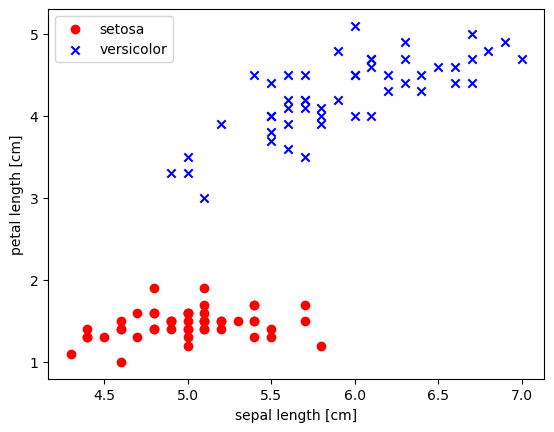

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#display the graph
plt.show()

Again, since the two classes are **linearly seperable** we know our Adaline we wrote earlier is going to perform well.

## Let's feed the training data into two Adalines

In [5]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

Notice, both Adalines were created with different learning rates, `0.01` and `0.0001`.

Now, let's plot the cost against the number of epochs for the two different learning rates.

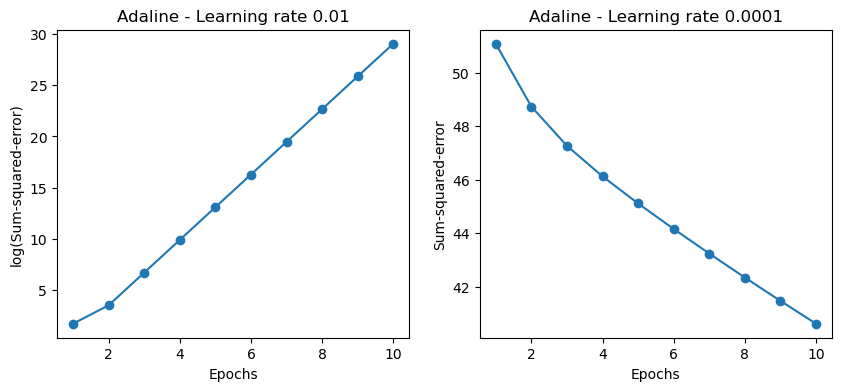

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Left plot
ax[0].plot(range(1, len(ada1.cost_) + 1), 
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

#Right plot
ax[1].plot(range(1, len(ada2.cost_) + 1),
          ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

#Show entire figure
plt.show()

The left chart shows what could happen *if we choose a learning rate that is too large*. Instead of minimizing the cost function, the error becomes larger in every epoch, because we overshoot (go past) the global minimum. On the other hand, we can see that the cost decreases on the right plot, but the chosen learning rate, 𝜂 = 0.0001, is so small that the algorithm would require a very large number of epochs to converge to the global cost minimum

# Improving gradient descent through feature scaling

**Standardization** is the process of putting different variables on the **same scale**. Many ML algorithms require  standardizing features for optimal performance. Let's standardize the features of our training set:

In [7]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std() #Standardize column 0
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std() #Standardize column 1

Let's graph the standardized data

C:\Users\billy\AppData\Local\Temp\ipykernel_13196\3052423817.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


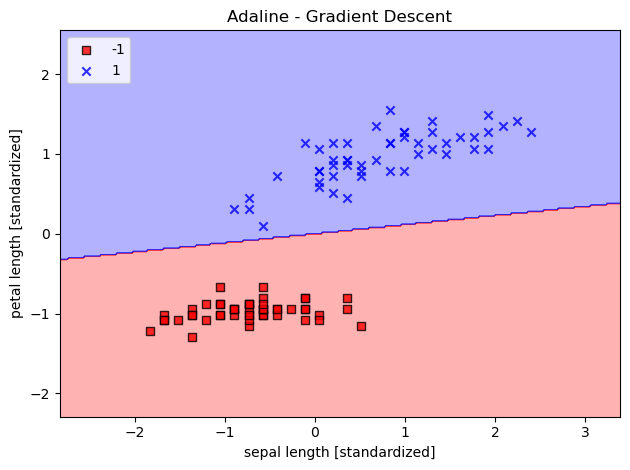

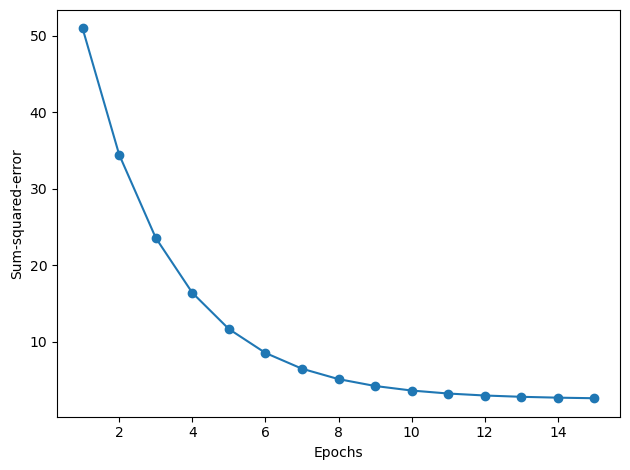

In [8]:
#An helper function that will be used down below. Can be found in the book
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
     markers = ('s', 'x', 'o', '^', 'v')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])
 
     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
     np.arange(x2_min, x2_max, resolution))
     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     Z = Z.reshape(xx1.shape)
     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())
     
     # plot class examples
     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                     marker=markers[idx],
                     label=cl,
                     edgecolor='black')

#Create a new Adaline and train it
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

#Graph the decision regions
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#Graph the cost against the number of epochs, to see how the neuron is learning
plt.plot(range(1, len(ada_gd.cost_) + 1),
         ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()